In [3]:
from sewar.full_ref import psnr, ssim, msssim, vifp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
model = [modelname for modelname in os.listdir() if modelname.startswith('model')]
p_model = np.zeros((4,8))
s_model = np.zeros((4,8))
ms_model = np.zeros((4,8))
v_model = np.zeros((4,8))
for m in range(0,len(model)):
    
    listname = os.listdir(model[m])
    for l in range(0,len(listname)):
        if os.path.isdir(os.path.join(model[m],listname[l])):
            orig_path = os.path.join(model[m],listname[l],'kodim01.png')
            comp_path = os.path.join(model[m],listname[l],'kodim01.png.tfci.png')

            orig = Image.open(orig_path)
            comp = Image.open(comp_path)
            p = psnr(np.asanyarray(orig),np.asanyarray(comp))
            s = ssim(np.asanyarray(orig),np.asanyarray(comp))  # return ssim value, cs value
            s = s[0]
            ms = msssim(np.asanyarray(orig),np.asanyarray(comp))
            v = vifp(np.asanyarray(orig),np.asanyarray(comp))

            i = orig_path.split('/')[1][-1]
            j = orig_path.split('/')[0][-1]
            # print('psnr of level %s = %f' % (i,p))
            # print('ssim of level %s = %f' % (i,s))

            p_model[int(j)-1,int(i)-1] = p
            s_model[int(j)-1,int(i)-1] = s
            ms_model[int(j)-1,int(i)-1] = ms
            v_model[int(j)-1,int(i)-1] = v
            
#print('psnr:\n',p_model)
#print('ssim:\n',s_model) 
#print('msssim:\n',ms_model)
#print('vifp:\n',v_model)
            # p_total.append(p)  # NOT p_total = p_total.append(p)

In [24]:
import pandas as pd
bpp = pd.read_csv('bmshj2018/model-1.csv')
x1=bpp.iloc[0,2:9].values.tolist()
x2=bpp.iloc[1,2:9].values.tolist()
x3=bpp.iloc[2,2:9].values.tolist()
x4=bpp.iloc[3,2:9].values.tolist()

In [6]:
plt.figure(figsize=(8,6))
plt.plot(x1,p_model[0,:],'s-',color='r',label='bmshj2018-factorized-mse')
plt.plot(x2,p_model[1,:],'o-',color='g',label='bmshj2018-factorized-msssim')
plt.plot(x3,p_model[2,:],'v-',color='b',label='bmshj2018-hyperprior-mse')
plt.plot(x4,p_model[3,:],'*-',color='y',label='bmshj2018-hyperprior-msssim')
plt.legend(loc = "best")
plt.xlabel('Bits Per Pixel')
plt.ylabel('PSNR')
plt.grid()
plt.show()

In [25]:
plt.figure(figsize=(8,6))
plt.plot(x1,s_model[0,:],'s-',color='r',label='bmshj2018-factorized-mse')
plt.plot(x2,s_model[1,:],'o-',color='g',label='bmshj2018-factorized-msssim')
plt.plot(x3,s_model[2,:],'v-',color='b',label='bmshj2018-hyperprior-mse')
plt.plot(x4,s_model[3,:],'*-',color='y',label='bmshj2018-hyperprior-msssim')
plt.legend(loc = "best")
plt.xlabel('Bits Per Pixel')
plt.ylabel('SSIM')
plt.yscale('logit')
plt.grid()
plt.show()

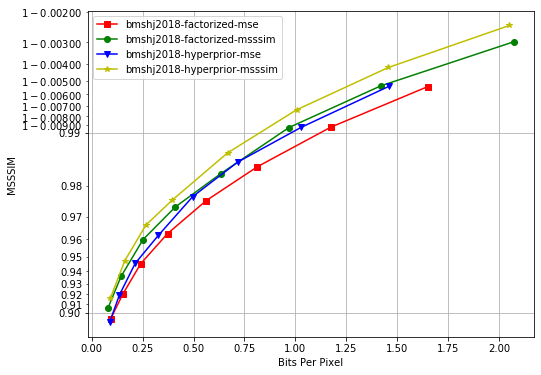

In [23]:
plt.figure(figsize=(8,6))
plt.plot(x1,ms_model[0,:],'s-',color='r',label='bmshj2018-factorized-mse')
plt.plot(x2,ms_model[1,:],'o-',color='g',label='bmshj2018-factorized-msssim')
plt.plot(x3,ms_model[2,:],'v-',color='b',label='bmshj2018-hyperprior-mse')
plt.plot(x4,ms_model[3,:],'*-',color='y',label='bmshj2018-hyperprior-msssim')
plt.legend(loc = "best")
plt.xlabel('Bits Per Pixel')
plt.ylabel('MSSSIM')
plt.yscale('logit')
plt.grid()
plt.show()

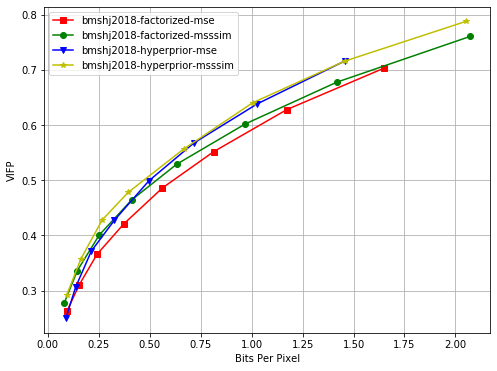

In [24]:
plt.figure(figsize=(8,6))
plt.plot(x1,v_model[0,:],'s-',color='r',label='bmshj2018-factorized-mse')
plt.plot(x2,v_model[1,:],'o-',color='g',label='bmshj2018-factorized-msssim')
plt.plot(x3,v_model[2,:],'v-',color='b',label='bmshj2018-hyperprior-mse')
plt.plot(x4,v_model[3,:],'*-',color='y',label='bmshj2018-hyperprior-msssim')
plt.legend(loc = "best")
plt.xlabel('Bits Per Pixel')
plt.ylabel('VIFP')
plt.grid()
plt.show()